In [ ]:
pip install --upgrade opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 #install opencv-python


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
config_file = '/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [ ]:
frozen_model = '/content/frozen_inference_graph.pb'

In [ ]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [ ]:
classLabels = [] #empty list
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')
  #classLabels.append(fpt.read())

In [ ]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) #mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7f8408a21c10>

In [ ]:
#now read an image

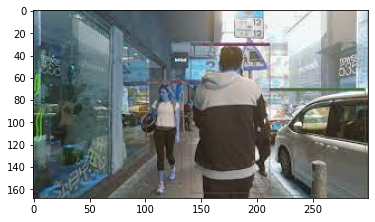

In [ ]:
img = cv2.imread('/content/img1.jpg')
plt.imshow(img)

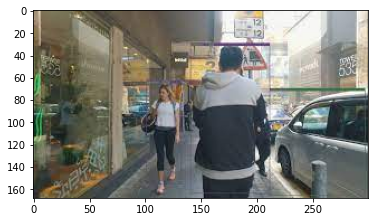

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold = 0.5)

In [ ]:
print(ClassIndex)

[1 3 1]


In [ ]:
font_scale = 1
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
for classInd, conf, boxes in zip(ClassIndex, confidence, bbox ):
  #cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
  #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)
  cv2.rectangle(img, boxes, (255,0,0), 2)
  cv2.putText(img, classLabels[classInd-1], (boxes[0]+10, boxes[1]+50), font, fontScale=font_scale,color=(0,255,0), thickness=1)

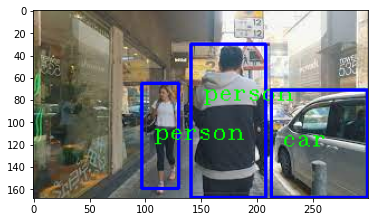

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))